## Objectives

 ***Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***




## The Data Science Pipeline
Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. 



#### 1.1. Importing Libraries

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### 1.2.  Loading the data
The data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# reading the data from the excel
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.


**2.1. Exploring the data** 


In [6]:
properties.shape
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
2,1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
3,1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
4,1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597


**2.2. Cleaning the data**

Transposing the datarame, in order to check out what its row indexes are, and reset the index  

In [13]:
properties_T = properties.T


,0,1,2,3,4,5,6,7,8,9,...,358,359,360,361,362,363,364,365,366,367
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00
City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,103215,...,741142,727287,768704,786475,741022,705268,724958,787337,790569,764386
Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,52909,...,343855,351552,354679,354977,359236,366660,368476,365422,358980,360648
Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,98936,...,628636,629057,622966,610437,596874,592761,583158,574891,585054,598188
Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,64508,...,406210,404492,403240,403754,406923,406459,398222,400558,402752,413751


In [14]:
properties_T.index


Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [15]:
properties_T = properties_T.reset_index()
properties_T.index

RangeIndex(start=0, stop=49, step=1)

In [16]:
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,358,359,360,361,362,363,364,365,366,367
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,741142,727287,768704,786475,741022,705268,724958,787337,790569,764386
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,343855,351552,354679,354977,359236,366660,368476,365422,358980,360648
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,628636,629057,622966,610437,596874,592761,583158,574891,585054,598188
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,406210,404492,403240,403754,406923,406459,398222,400558,402752,413751


In [17]:
properties_T.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           358,     359,     360,     361,     362,     363,     364,     365,
           366,     367],
      dtype='object', length=369)

In [18]:
properties_T.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,358,359,360,361,362,363,364,365,366,367
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00


In [19]:
properties_T.columns = properties_T.iloc[0]
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,741142,727287,768704,786475,741022,705268,724958,787337,790569,764386
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,343855,351552,354679,354977,359236,366660,368476,365422,358980,360648
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,628636,629057,622966,610437,596874,592761,583158,574891,585054,598188
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,406210,404492,403240,403754,406923,406459,398222,400558,402752,413751


-> Changed the 0th index to years as it is a also a time series analysis

In [20]:
properties_T = properties_T.drop(0)
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,741142,727287,768704,786475,741022,705268,724958,787337,790569,764386
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,343855,351552,354679,354977,359236,366660,368476,365422,358980,360648
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,628636,629057,622966,610437,596874,592761,583158,574891,585054,598188
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,406210,404492,403240,403754,406923,406459,398222,400558,402752,413751
5,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,589959,588941,577365,566321,563191,562911,569300,561173,546742,536480


**2.3. Cleaning the data (part 2)**

        renamed the columns 

In [21]:
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,741142,727287,768704,786475,741022,705268,724958,787337,790569,764386
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,343855,351552,354679,354977,359236,366660,368476,365422,358980,360648
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,628636,629057,622966,610437,596874,592761,583158,574891,585054,598188
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,406210,404492,403240,403754,406923,406459,398222,400558,402752,413751
5,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,589959,588941,577365,566321,563191,562911,569300,561173,546742,536480


In [22]:
properties_T.columns

Index([   'London_Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2024-10-01 00:00:00, 2024-11-01 00:00:00, 2024-12-01 00:00:00,
       2025-01-01 00:00:00, 2025-02-01 00:00:00, 2025-03-01 00:00:00,
       2025-04-01 00:00:00, 2025-05-01 00:00:00, 2025-06-01 00:00:00,
       2025-07-01 00:00:00],
      dtype='object', name=0, length=369)

**2.4.Transforming the data**

**Melted** the data in order to have less number of columns.

In [23]:
clean_properties = pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01 00:00:00,90347
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870
2,Barnet,E09000003,1995-01-01 00:00:00,98948
3,Bexley,E09000004,1995-01-01 00:00:00,64956
4,Brent,E09000005,1995-01-01 00:00:00,76880


Made sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [24]:
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870
2,Barnet,E09000003,1995-01-01 00:00:00,98948
3,Bexley,E09000004,1995-01-01 00:00:00,64956
4,Brent,E09000005,1995-01-01 00:00:00,76880


In [25]:
clean_properties.dtypes

London_Borough    object
ID                object
Month             object
Average_price     object
dtype: object

Converted the average price column to float.

In [27]:
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])
clean_properties.dtypes

London_Borough     object
ID                 object
Month              object
Average_price     float64
dtype: object

**2.5. Cleaning the data (part 3)**

Checking out the contents of the London Borough column, and to find null values and any other unncessary information.

In [28]:
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [29]:
clean_properties[clean_properties['London_Borough'] == 'Unnamed :34'].head()

,London_Borough,ID,Month,Average_price


In [30]:
clean_properties[clean_properties['London_Borough'] =='Unnamed: 37'].head()

,London_Borough,ID,Month,Average_price
36,Unnamed: 37,NaN,1995-01-01 00:00:00,NaN
84,Unnamed: 37,NaN,1995-02-01 00:00:00,NaN
132,Unnamed: 37,NaN,1995-03-01 00:00:00,NaN
180,Unnamed: 37,NaN,1995-04-01 00:00:00,NaN
228,Unnamed: 37,NaN,1995-05-01 00:00:00,NaN


In [31]:
clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01 00:00:00,NaN
36,Unnamed: 37,NaN,1995-01-01 00:00:00,NaN
46,Unnamed: 47,NaN,1995-01-01 00:00:00,NaN
81,Unnamed: 34,NaN,1995-02-01 00:00:00,NaN
84,Unnamed: 37,NaN,1995-02-01 00:00:00,NaN
...,...,...,...,...
17556,Unnamed: 37,NaN,2025-06-01 00:00:00,NaN
17566,Unnamed: 47,NaN,2025-06-01 00:00:00,NaN
17601,Unnamed: 34,NaN,2025-07-01 00:00:00,NaN
17604,Unnamed: 37,NaN,2025-07-01 00:00:00,NaN


In [32]:
NaNFreeDF1 = clean_properties[clean_properties['Average_price'].notna()]
NaNFreeDF1.head(48)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0
5,Bromley,E09000006,1995-01-01 00:00:00,83082.0
6,Camden,E09000007,1995-01-01 00:00:00,119775.0
7,Croydon,E09000008,1995-01-01 00:00:00,70118.0
8,Ealing,E09000009,1995-01-01 00:00:00,85469.0
9,Enfield,E09000010,1995-01-01 00:00:00,77018.0


In [33]:
NaNFreeDF1.count()

London_Borough    16515
ID                16515
Month             16515
Average_price     16515
dtype: int64

In [34]:
NaNFreeDF2 = clean_properties.dropna()
NaNFreeDF2.head(48)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0
5,Bromley,E09000006,1995-01-01 00:00:00,83082.0
6,Camden,E09000007,1995-01-01 00:00:00,119775.0
7,Croydon,E09000008,1995-01-01 00:00:00,70118.0
8,Ealing,E09000009,1995-01-01 00:00:00,85469.0
9,Enfield,E09000010,1995-01-01 00:00:00,77018.0


In [35]:
NaNFreeDF2.count()

London_Borough    16515
ID                16515
Month             16515
Average_price     16515
dtype: int64

In [36]:
NaNFreeDF2['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

After cleaning the data by dropping the null values and removing the unnecessary information. This how the data looks.

In [37]:
print(clean_properties.shape)
print(NaNFreeDF1.shape)
print(NaNFreeDF2.shape)

(17616, 4)
(16515, 4)
(16515, 4)


In [39]:
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']
NaNFreeDF2[NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
34,Inner London,E13000001,1995-01-01 00:00:00,85892.0
35,Outer London,E13000002,1995-01-01 00:00:00,76196.0
37,NORTH EAST,E12000001,1995-01-01 00:00:00,39809.0
38,NORTH WEST,E12000002,1995-01-01 00:00:00,40907.0
39,YORKS & THE HUMBER,E12000003,1995-01-01 00:00:00,42171.0
...,...,...,...,...
17610,EAST OF ENGLAND,E12000006,2025-07-01 00:00:00,337650.0
17611,LONDON,E12000007,2025-07-01 00:00:00,561587.0
17612,SOUTH EAST,E12000008,2025-07-01 00:00:00,381764.0
17613,SOUTH WEST,E12000009,2025-07-01 00:00:00,306148.0


In [40]:
NaNFreeDF2[NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
34,Inner London,E13000001,1995-01-01 00:00:00,85892.0
35,Outer London,E13000002,1995-01-01 00:00:00,76196.0
37,NORTH EAST,E12000001,1995-01-01 00:00:00,39809.0
38,NORTH WEST,E12000002,1995-01-01 00:00:00,40907.0
39,YORKS & THE HUMBER,E12000003,1995-01-01 00:00:00,42171.0
...,...,...,...,...
17610,EAST OF ENGLAND,E12000006,2025-07-01 00:00:00,337650.0
17611,LONDON,E12000007,2025-07-01 00:00:00,561587.0
17612,SOUTH EAST,E12000008,2025-07-01 00:00:00,381764.0
17613,SOUTH WEST,E12000009,2025-07-01 00:00:00,306148.0


In [41]:
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]
NaNFreeDF2.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0


In [42]:
df = NaNFreeDF2
df.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0


In [43]:
df.dtypes

London_Borough     object
ID                 object
Month              object
Average_price     float64
dtype: object

**2.6. Visualizing the data**

To visualize the data,subset on a particular London Borough.A line plot of Month against Average Price

Text(0, 0.5, 'Price')

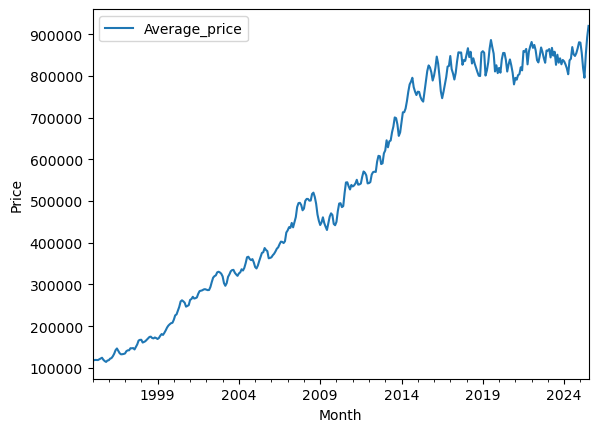

In [44]:
camden_prices = df[df['London_Borough'] == 'Camden']
ax = camden_prices.plot(kind ='line', x = 'Month', y='Average_price')
ax.set_ylabel('Price')

### Extracting Year from the Month Column

To limit the number of data points in my dataset, I decided to extract the **year** from each value in the *Month* column.  
For this, I applied a **lambda function** that:

1. Iterates through each entry in the *Month* column  
2. Extracts the **year** from each date value  
3. Stores that year in a new column called *Year*  

This step simplified the dataset by summarizing monthly price data into yearly averages.  
However, using this approach was optional — the main goal remained to determine **which London boroughs have experienced the greatest average increase in house prices over the past two decades**.


In [45]:
df['Year'] = df['Month'].apply(lambda t: t.year)
df.tail()
df.dtypes

London_Borough     object
ID                 object
Month              object
Average_price     float64
Year                int64
dtype: object

In [46]:
dfg = df.groupby(by=['London_Borough', 'Year'])['Average_price'].mean()
dfg.sample(10)

London_Borough        Year
Haringey              2008    326102.083333
Barking & Dagenham    2023    346955.333333
Lambeth               2000    158478.250000
Ealing                2014    427997.666667
Hillingdon            2025    477727.857143
Hounslow              1998    113291.916667
Barnet                2022    631641.250000
Barking & Dagenham    1997     57537.583333
Haringey              2007    328373.583333
Kensington & Chelsea  2006    647041.416667
Name: Average_price, dtype: float64

In [47]:
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,53265.416667
1,Barking & Dagenham,1996,53162.666667
2,Barking & Dagenham,1997,57537.583333
3,Barking & Dagenham,1998,61969.666667
4,Barking & Dagenham,1999,67145.333333



### 3. Modeling

In this section, I focused on quantifying how house prices have changed across London boroughs over time.  
To achieve this, I considered creating a function called **`create_price_ratio`**, which calculates the **ratio** of average house prices between two specific years — 1998 and 2018.

This function should:

1. Take a filtered version of the DataFrame `dfg` as an argument, specifically where this filter constrains the `London_Borough`.  
   Example:  
   ```python
   dfg[dfg['London_Borough'] == 'Camden']


In [48]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2025 = float(d['Average_price'][d['Year']==2025])
    ratio = [y2025/y1998]
    return ratio


In [49]:
create_price_ratio(dfg[dfg['London_Borough']=='Barking & Dagenham'])

C:\Users\visha\AppData\Local\Temp\ipykernel_24028\3376516622.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998 = float(d['Average_price'][d['Year']==1998])
C:\Users\visha\AppData\Local\Temp\ipykernel_24028\3376516622.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2025 = float(d['Average_price'][d['Year']==2025])


[5.842487453539097]

Used for Loop to Iterate over all the columns and applied the function. 

In [50]:
final = {}
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == b]
    final[b] = create_price_ratio(borough)
print(final)

{'Barking & Dagenham': [5.842487453539097], 'Barnet': [4.558390801244999], 'Bexley': [5.018381769952219], 'Brent': [5.140059540075507], 'Bromley': [4.760996819138298], 'Camden': [5.08282086132479], 'City of London': [5.177107027756379], 'Croydon': [4.4986670023638675], 'Ealing': [4.823349351954868], 'Enfield': [4.803325068934915], 'Greenwich': [5.36265289232771], 'Hackney': [6.694855471855508], 'Hammersmith & Fulham': [4.2854358125183145], 'Haringey': [5.434105650496884], 'Harrow': [4.615155182190494], 'Havering': [5.085288687468665], 'Hillingdon': [4.762961901778809], 'Hounslow': [4.700784246680063], 'Islington': [5.1115425331949496], 'Kensington & Chelsea': [4.799263361414577], 'Kingston upon Thames': [4.82346880861024], 'Lambeth': [5.087681473386059], 'Lewisham': [6.160466176247164], 'Merton': [5.4267578316240765], 'Newham': [6.041739109351496], 'Redbridge': [5.253217959535394], 'Richmond upon Thames': [4.704253054424287], 'Southwark': [5.625796312204372], 'Sutton': [4.7556730993505

C:\Users\visha\AppData\Local\Temp\ipykernel_24028\3376516622.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998 = float(d['Average_price'][d['Year']==1998])
C:\Users\visha\AppData\Local\Temp\ipykernel_24028\3376516622.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2025 = float(d['Average_price'][d['Year']==2025])


In [52]:
df_ratios = pd.DataFrame(final)
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,5.842487,4.558391,5.018382,5.14006,4.760997,5.082821,5.177107,4.498667,4.823349,4.803325,...,5.426758,6.041739,5.253218,4.704253,5.625796,4.755673,4.745071,6.626592,4.87597,4.88512


In [53]:
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,5.842487
1,Barnet,4.558391
2,Bexley,5.018382
3,Brent,5.140060
4,Bromley,4.760997


In [54]:
df_ratios.rename(columns={'index':'Borough', 0:'2025'}, inplace=True)
df_ratios.head()

,Borough,2025
0,Barking & Dagenham,5.842487
1,Barnet,4.558391
2,Bexley,5.018382
3,Brent,5.140060
4,Bromley,4.760997


### Observation
Stored the df and sorted the values after applying the function and below is the observation.

In [57]:
top15 = df_ratios.sort_values(by='2025',ascending=True).head(15)
print(top15)

                 Borough      2025
12  Hammersmith & Fulham  4.285436
7                Croydon  4.498667
1                 Barnet  4.558391
14                Harrow  4.615155
17              Hounslow  4.700784
26  Richmond upon Thames  4.704253
29         Tower Hamlets  4.745071
28                Sutton  4.755673
4                Bromley  4.760997
16            Hillingdon  4.762962
19  Kensington & Chelsea  4.799263
9                Enfield  4.803325
8                 Ealing  4.823349
20  Kingston upon Thames  4.823469
31            Wandsworth  4.875970


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Lewisham'),
 Text(3, 0, 'Newham'),
 Text(4, 0, 'Barking & Dagenham'),
 Text(5, 0, 'Southwark'),
 Text(6, 0, 'Haringey'),
 Text(7, 0, 'Merton'),
 Text(8, 0, 'Greenwich'),
 Text(9, 0, 'Redbridge'),
 Text(10, 0, 'City of London'),
 Text(11, 0, 'Brent'),
 Text(12, 0, 'Islington'),
 Text(13, 0, 'Lambeth'),
 Text(14, 0, 'Havering')]

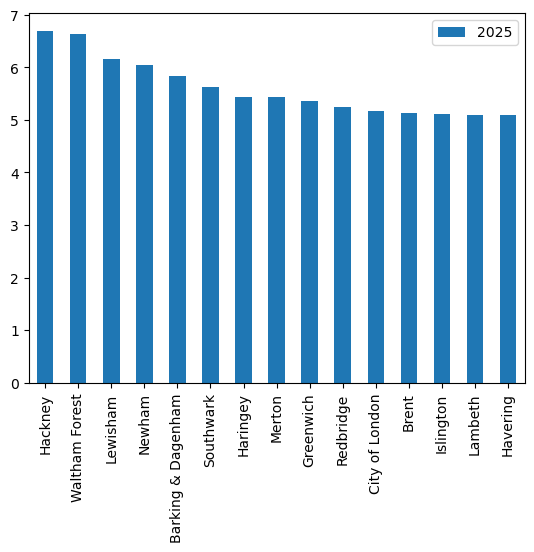

In [56]:
ax = top15[['Borough','2025']].plot(kind='bar')

ax.set_xticklabels(top15.Borough)

### 4. Conclusion
This project analyzed changes in average housing prices across London boroughs from 1998 to 2025. After cleaning and reshaping the data, I calculated growth ratios to measure long-term price increases. The results showed that Hackney (6.69×), Waltham Forest (6.62×), and Lewisham (6.46×) had the highest growth, while Hammersmith & Fulham (4.28×) and Croydon (4.49×) had the lowest. Overall, most boroughs saw prices rise between 4× and 7×, highlighting the strong upward trend in London’s housing market.